# Boston Housing Price dataset for analysis on House Prices 

In [1]:
# Importing the modules

import tensorflow as tf
import pandas as pd
import numpy as np
%matplotlib inline

import seaborn as sb

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0-beta0'

In [3]:
# Load the dataset

data = tf.keras.datasets.boston_housing

(x_train,y_train),(x_test,y_test)= data.load_data()


In [4]:
column_names = ['crime', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df_xtrain = pd.DataFrame(x_train,columns=column_names)

df_xtrain.head()

,crime,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


This data frame contains the following columns:

**

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in \$1000s.

**

In [4]:
print("train data",x_train.shape)
print("train labels",y_train.shape)
print("test data",x_test.shape)
print("train labels",y_test.shape)

train data (404, 13)
train labels (404,)
test data (102, 13)
train labels (102,)


In [5]:
# standardized/normalized data

mean=x_train.mean(axis=0)

std=x_train.std(axis=0)

x_train2=(x_train-mean)/std

df_train_norm = pd.DataFrame(x_train2, columns=column_names)

df_train_norm.head()

,crime,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497


In [6]:
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [7]:
# combining x_train and y_train for fidning the corealation between features and sales

training_data=np.insert(arr=x_train,values=y_train,axis=1,obj=13)

column_names = ['crime' ,'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT','price']

df_train = pd.DataFrame(training_data,columns=column_names)

df_train.head()


,crime,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


Another more easy way of finding corealtion is this:

Downhill (negative / positive) linear relationship

Uphill (negative / positive) linear relationship


In [8]:
df = df_train.copy()

# Compute pairwise correlation of columns

df.corr()

,crime,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
crime,1.000000,-0.192179,0.397419,-0.050828,0.405765,-0.217597,0.344410,-0.378590,0.609689,0.575652,0.273447,-0.390613,0.434384,-0.378498
ZN,-0.192179,1.000000,-0.533823,-0.041981,-0.521713,0.338683,-0.578728,0.650787,-0.311091,-0.303522,-0.403139,0.176006,-0.415237,0.380299
INDUS,0.397419,-0.533823,1.000000,0.052839,0.774200,-0.409924,0.656350,-0.725155,0.599226,0.701362,0.379284,-0.372885,0.603129,-0.476743
CHAS,-0.050828,-0.041981,0.052839,1.000000,0.079803,0.040431,0.080488,-0.083101,-0.024851,-0.051343,-0.122008,0.037832,-0.011017,0.168661
NOX,0.405765,-0.521713,0.774200,0.079803,1.000000,-0.335866,0.729338,-0.777062,0.616535,0.673471,0.188160,-0.409479,0.592994,-0.438328
RM,-0.217597,0.338683,-0.409924,0.040431,-0.335866,1.000000,-0.240875,0.233970,-0.243990,-0.307904,-0.367256,0.145525,-0.610844,0.681483
AGE,0.344410,-0.578728,0.656350,0.080488,0.729338,-0.240875,1.000000,-0.766670,0.462188,0.512746,0.282193,-0.278403,0.590898,-0.364173
DIS,-0.378590,0.650787,-0.725155,-0.083101,-0.777062,0.233970,-0.766670,1.000000,-0.511179,-0.543668,-0.243067,0.295995,-0.507075,0.253900
RAD,0.609689,-0.311091,0.599226,-0.024851,0.616535,-0.243990,0.462188,-0.511179,1.000000,0.922676,0.449908,-0.478245,0.490250,-0.375515
TAX,0.575652,-0.303522,0.701362,-0.051343,0.673471,-0.307904,0.512746,-0.543668,0.922676,1.000000,0.440499,-0.471777,0.534752,-0.448737


so we can see that a few columns are primary affecting the price of the house

----

In [9]:
print(x_train.shape)
print(y_train.shape)
print(training_data.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(404, 14)
(102, 13)
(102,)


In [10]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0,7])



Train on 323 samples, validate on 81 samples
Epoch 1/200
323/323 - 0s - loss: 332.3781 - mae: 14.3706 - val_loss: 983.4777 - val_mae: 28.4925
Epoch 2/200
323/323 - 0s - loss: 172.2582 - mae: 8.6256 - val_loss: 120.2579 - val_mae: 6.9993
Epoch 3/200
323/323 - 0s - loss: 120.1058 - mae: 8.5473 - val_loss: 274.1673 - val_mae: 15.4930
Epoch 4/200
323/323 - 0s - loss: 138.2828 - mae: 8.9752 - val_loss: 285.4474 - val_mae: 14.1553
Epoch 5/200
323/323 - 0s - loss: 146.9851 - mae: 10.0704 - val_loss: 106.4577 - val_mae: 8.3530
Epoch 6/200
323/323 - 0s - loss: 72.4143 - mae: 6.2755 - val_loss: 117.7525 - val_mae: 7.1139
Epoch 7/200
323/323 - 0s - loss: 164.4223 - mae: 9.4470 - val_loss: 155.8751 - val_mae: 9.2265
Epoch 8/200
323/323 - 0s - loss: 111.3588 - mae: 8.2878 - val_loss: 192.5773 - val_mae: 10.9086
Epoch 9/200
323/323 - 0s - loss: 136.0412 - mae: 9.6969 - val_loss: 91.5992 - val_mae: 7.4531
Epoch 10/200
323/323 - 0s - loss: 75.8785 - mae: 6.4680 - val_loss: 229.3666 - val_mae: 14.0981


Epoch 87/200
323/323 - 0s - loss: 50.4019 - mae: 5.2172 - val_loss: 46.3246 - val_mae: 4.3715
Epoch 88/200
323/323 - 0s - loss: 44.5879 - mae: 5.0243 - val_loss: 46.3601 - val_mae: 5.3298
Epoch 89/200
323/323 - 0s - loss: 47.3101 - mae: 5.2983 - val_loss: 47.5581 - val_mae: 4.2255
Epoch 90/200
323/323 - 0s - loss: 43.0168 - mae: 4.6838 - val_loss: 44.5459 - val_mae: 4.3839
Epoch 91/200
323/323 - 0s - loss: 49.4637 - mae: 5.3974 - val_loss: 77.4957 - val_mae: 7.8853
Epoch 92/200
323/323 - 0s - loss: 42.3955 - mae: 4.9198 - val_loss: 42.7094 - val_mae: 4.6933
Epoch 93/200
323/323 - 0s - loss: 35.9977 - mae: 4.3600 - val_loss: 99.9125 - val_mae: 7.6743
Epoch 94/200
323/323 - 0s - loss: 52.0064 - mae: 5.6381 - val_loss: 43.1067 - val_mae: 4.4146
Epoch 95/200
323/323 - 0s - loss: 37.2341 - mae: 4.3875 - val_loss: 42.7898 - val_mae: 4.4275
Epoch 96/200
323/323 - 0s - loss: 59.9202 - mae: 5.4816 - val_loss: 43.0782 - val_mae: 4.2360
Epoch 97/200
323/323 - 0s - loss: 28.7249 - mae: 3.8153 - va

Epoch 174/200
323/323 - 0s - loss: 24.1115 - mae: 3.4845 - val_loss: 96.8037 - val_mae: 8.7829
Epoch 175/200
323/323 - 0s - loss: 28.0053 - mae: 3.9339 - val_loss: 31.5801 - val_mae: 3.9244
Epoch 176/200
323/323 - 0s - loss: 24.4623 - mae: 3.8329 - val_loss: 30.2262 - val_mae: 3.7171
Epoch 177/200
323/323 - 0s - loss: 24.8215 - mae: 3.7294 - val_loss: 37.2139 - val_mae: 5.0336
Epoch 178/200
323/323 - 0s - loss: 29.6295 - mae: 3.8553 - val_loss: 33.4949 - val_mae: 4.2634
Epoch 179/200
323/323 - 0s - loss: 33.6192 - mae: 4.1262 - val_loss: 31.5565 - val_mae: 3.7876
Epoch 180/200
323/323 - 0s - loss: 21.4873 - mae: 3.3398 - val_loss: 28.7431 - val_mae: 4.1485
Epoch 181/200
323/323 - 0s - loss: 24.8499 - mae: 3.7024 - val_loss: 34.7496 - val_mae: 4.2409
Epoch 182/200
323/323 - 0s - loss: 21.9140 - mae: 3.5632 - val_loss: 30.6464 - val_mae: 3.8302
Epoch 183/200
323/323 - 0s - loss: 21.8074 - mae: 3.5701 - val_loss: 37.5977 - val_mae: 5.0706
Epoch 184/200
323/323 - 0s - loss: 27.8057 - mae: 

KeyError: 'mean_absolute_error'

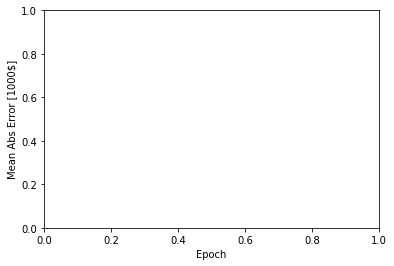

In [11]:
Epochs=200

Loss="mse"

model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='rmsprop',loss=Loss,metrics=['mae'])

history=model.fit(x_train,y_train,epochs=Epochs,validation_split=0.2,verbose=2)

plot_history(history)


In [12]:
loss,mae=model.evaluate(x_test,y_test)

print('mae=', mae)

102/102 [==============================] - 0s 107us/sample - loss: 44.2010 - mae: 4.9081
mae= 4.9080806


In [13]:
all_price_sum = y_train.sum()+y_test.sum()
Number_of_prices = y_train.size+y_test.size  #number of all labels

print("Average of prices of all the data = ",all_price_sum/Number_of_prices)

Average of prices of all the data =  22.53280632411067


## The average of price is 22,000 while our mean absolute error is around 3 to 4.5k